In [1]:
from google.colab import files
uploaded = files.upload()

Saving linear_regression_housing_area_price (1).py to linear_regression_housing_area_price (1) (1).py
Saving multiple_lr_homeprice.py to multiple_lr_homeprice (1).py


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv("canada_per_capita_income.csv")
df.head()
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [9]:
# Rename columns if needed (optional safety step)
df.columns = ['year', 'income']

# Define features (X) and target (y)
X = df[['year']]        # Independent variable must be 2D
y = df['income']        # Dependent variable

In [10]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [11]:
# Predict income for year 2020
predicted_income = model.predict([[2020]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted per capita income for Canada in 2020: $ 41288.69409441762


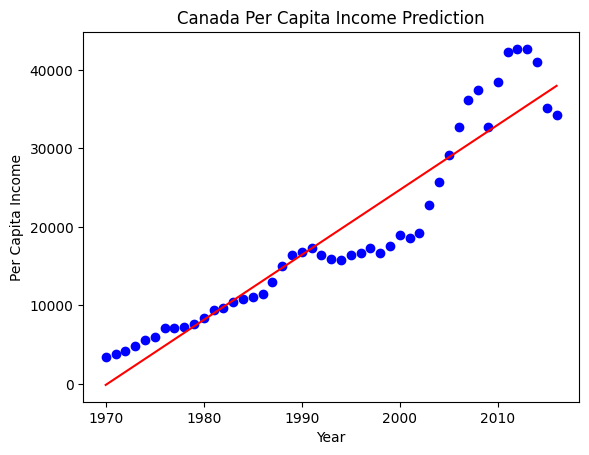

In [12]:
print("Predicted per capita income for Canada in 2020: $", predicted_income[0])

# Optional: Plot regression line
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel("Year")
plt.ylabel("Per Capita Income")
plt.title("Canada Per Capita Income Prediction")
plt.show()

In [13]:
df_new = pd.read_csv("salary.csv")
df_new.info()
df_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  28 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [19]:
# Check missing values
print(df_new.isnull().sum())



YearsExperience    2
Salary             0
dtype: int64


In [20]:
# Option 1: Drop missing rows
df_new = df_new.dropna()

In [22]:
X = df_new[['YearsExperience']]
y = df_new['Salary']

# Create and train model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Predicted Salary for 12 years of experience: $ 139049.6749539778


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


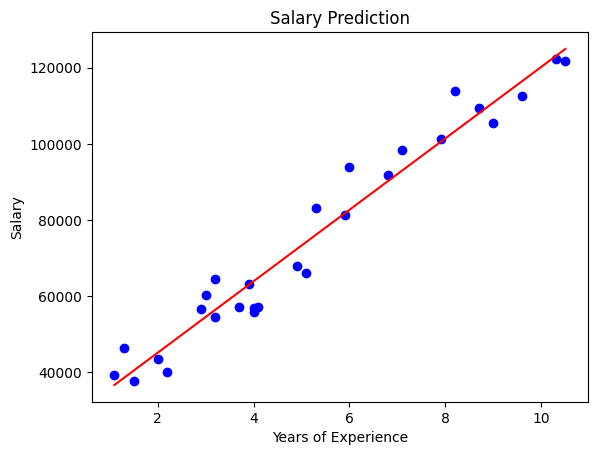

In [23]:
predicted_salary = model.predict([[12]])

print("Predicted Salary for 12 years of experience: $", predicted_salary[0])

# Optional: Plot regression line
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.show()

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("hiring.csv")

print("Original Data:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

# Rename columns to simple names (VERY IMPORTANT STEP)
df = df.rename(columns={
    'test_score(out of 10)': 'test_score',
    'interview_score(out of 10)': 'interview_score',
    'salary($)': 'salary'
})

# Convert word numbers to numeric
word_to_num = {
    'zero':0, 'one':1, 'two':2, 'three':3, 'four':4,
    'five':5, 'six':6, 'seven':7, 'eight':8,
    'nine':9, 'ten':10, 'eleven':11, 'twelve':12
}

df['experience'] = df['experience'].replace(word_to_num)

# Convert to numeric
df['experience'] = pd.to_numeric(df['experience'])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df[['experience','test_score','interview_score']] = imputer.fit_transform(
    df[['experience','test_score','interview_score']]
)

# Define features and target
X = df[['experience','test_score','interview_score']]
y = df['salary']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predictions
print("\nPredicted salary (2yr, 9 test, 6 interview):",
      model.predict([[2,9,6]])[0])

print("Predicted salary (12yr, 10 test, 10 interview):",
      model.predict([[12,10,10]])[0])

Original Data:
   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000

Missing Values:
 experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

Predicted salary (2yr, 9 test, 6 interview): 47738.891043133306
Predicted salary (12yr, 10 test, 10 interview): 86424.66795913098


/tmp/ipython-input-1357402532.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['experience'] = df['experience'].replace(word_to_num)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("1000_Companies.csv")

print("First 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

# Separate features and target
X = df.iloc[:, :-1]   # All columns except Profit
y = df.iloc[:, -1]    # Profit column

# One Hot Encode State column
X = pd.get_dummies(X, columns=['State'], drop_first=True)

print("\nColumns after encoding:\n", X.columns)

# Train model
model = LinearRegression()
model.fit(X, y)

# Prepare new input (Florida)
new_data = pd.DataFrame({
    'R&D Spend': [91694.48],
    'Administration': [515841.3],
    'Marketing Spend': [11931.24],
    'State_Florida': [1],
    'State_New York': [0]
})

# Make sure order matches training data
new_data = new_data.reindex(columns=X.columns, fill_value=0)

# Predict
predicted_profit = model.predict(new_data)

print("\nPredicted Profit:", predicted_profit[0])

First 5 rows:
    R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Missing values:
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Columns after encoding:
 Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida',
       'State_New York'],
      dtype='object')

Predicted Profit: 510570.9926108309
